In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [36]:
# matplotlib.rcParams.update({'font.size': 25})

In [37]:

file_name = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/log_nes_run_1715171268.8089328.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
    "avg_accepted": [],
    "max_accepted": [],
    "min_accepted": [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))
        if words[0] == "Avg_accepted":
            losses["avg_accepted"].append(float(words[-1]))
        if words[0] == "Min_accepted":
            losses["min_accepted"].append(float(words[-1]))
        if words[0] == "Max_accepted":
            losses["max_accepted"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

In [38]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

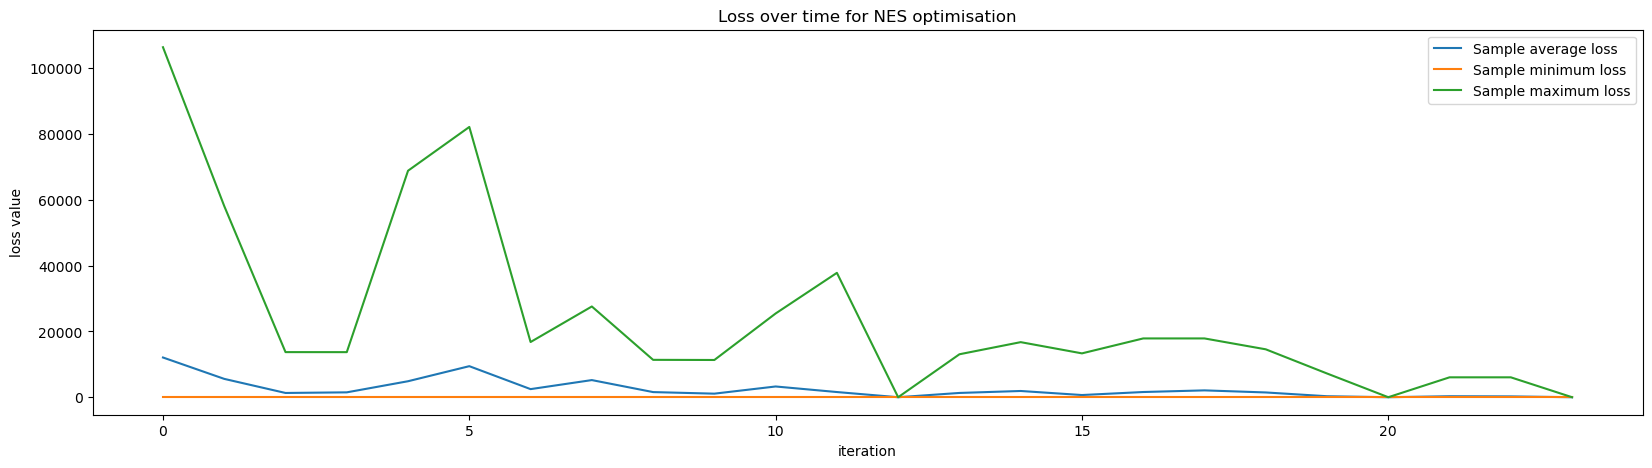

In [39]:
plt.figure(figsize=(20,5))
# plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

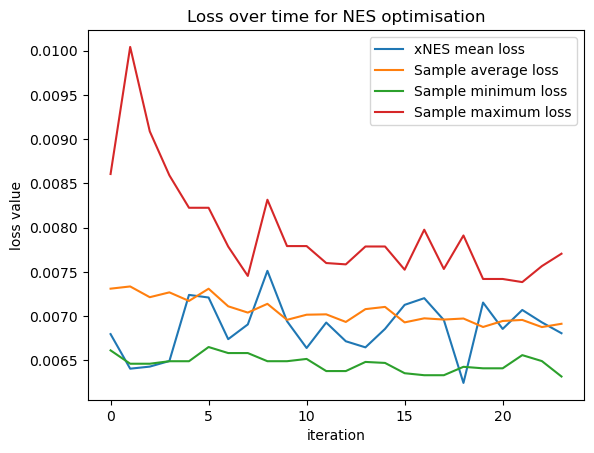

In [40]:
# plt.figure(figsize=(10,5))
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg_accepted"], label="Sample average loss")
plt.plot(loss_df["min_accepted"], label="Sample minimum loss")
plt.plot(loss_df["max_accepted"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

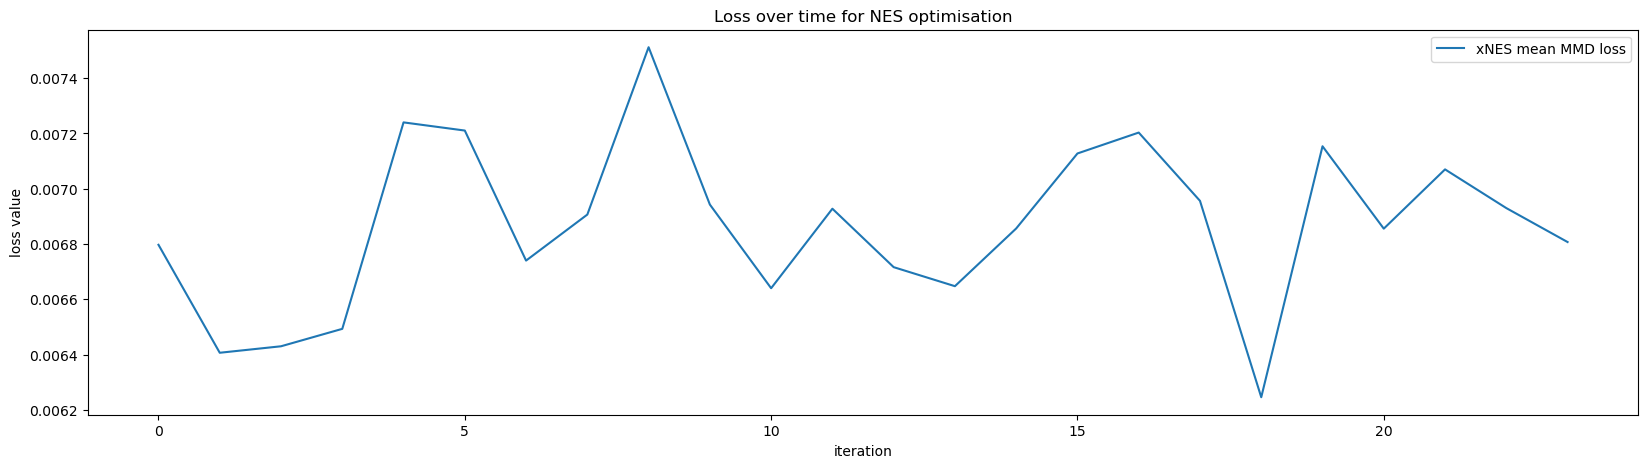

In [41]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [42]:
def plot_standing_average(array, show=True, label=""):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    print(standing_average[-2] - standing_average[-1])
    plt.plot(standing_average, label=label)

    if show:
        plt.show()

2.6156065376327017e-06
6.331315274623293e-06
6.438376770907979e-06
1.1201552324320574e-05


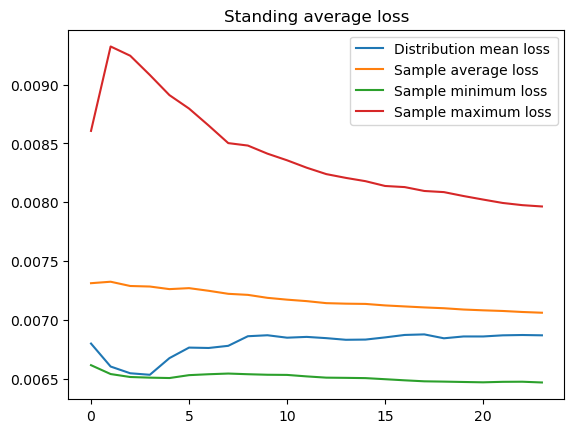

In [43]:
plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False, label="Distribution mean loss")
plot_standing_average(loss_df["avg_accepted"].to_numpy().squeeze(), show=False, label="Sample average loss")
plot_standing_average(loss_df["min_accepted"].to_numpy().squeeze(), show=False, label="Sample minimum loss")
plot_standing_average(loss_df["max_accepted"].to_numpy().squeeze(), show=False, label="Sample maximum loss")
plt.title("Standing average loss")
plt.legend()
plt.show()

# plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [27]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.00962536800198434
std: 0.006072196516341949
max: 0.0346379876136779
min: 0.006224513053894
range: 0.0284134745597839


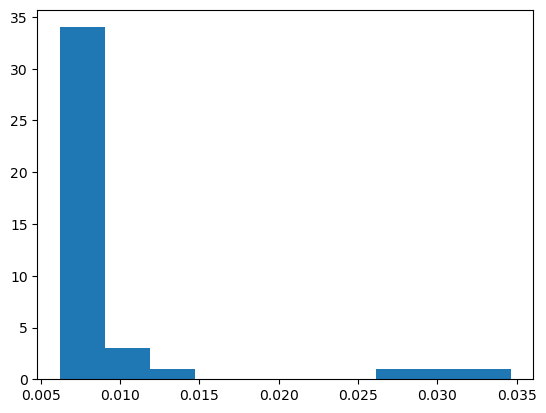

mean: 0.009945066486735127
std: 0.005768099614014512
max: 0.0327518209815025
min: 0.0072358078323304
range: 0.0255160131491721


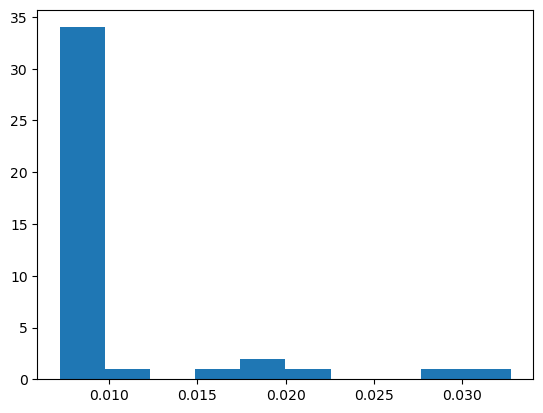

mean: 0.00700046085729826
std: 0.0014202368535241078
max: 0.0132989287376403
min: 0.0061590075492858
range: 0.007139921188354499


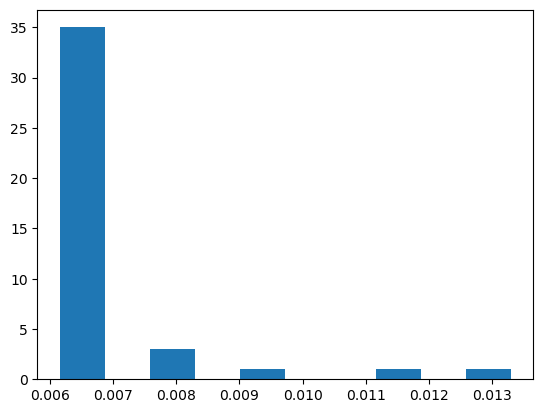

mean: 0.014422980750479292
std: 0.012809178087526777
max: 0.0704398155212402
min: 0.0081322193145751
range: 0.06230759620666511


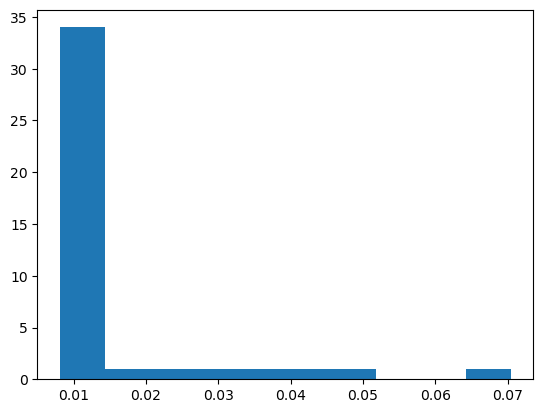

mean: 0.00962536800198434
std: 0.006072196516341949
max: 0.0346379876136779
min: 0.006224513053894
range: 0.0284134745597839


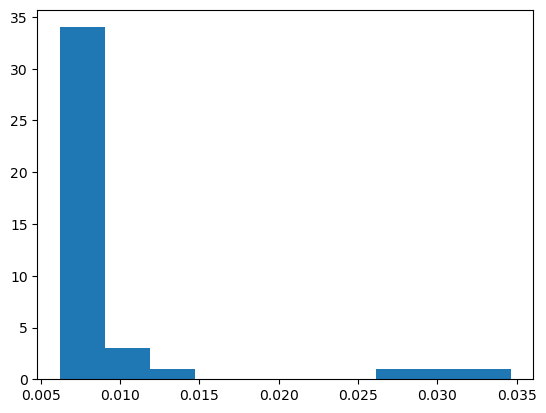

In [28]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["min_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["max_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

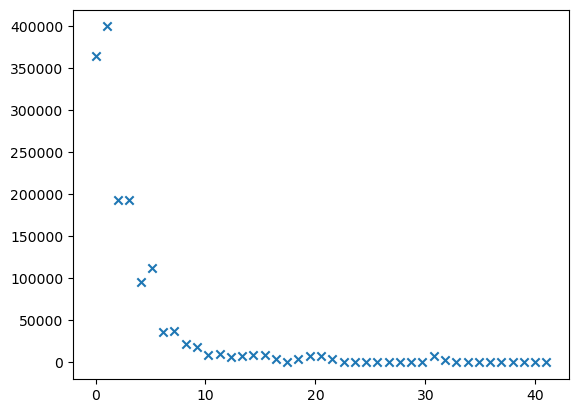

mean: 38116.46766143456
std: 90213.91009729997
max: 399620.51949608326
min: 0.0016437768936157
range: 399620.51785230637


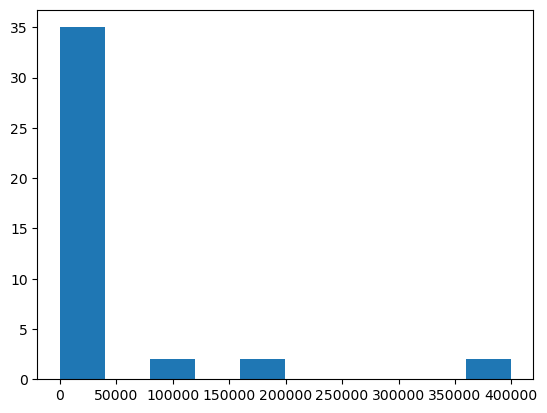

In [29]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())